# scaled density

In [2]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd
from scipy.misc import derivative

In [3]:
#interpolation for earth-like line

#earth like rocky 32.5% Fe + 67.5% MgSiO3
radius_earthlike = []
mass_earthlike = []

with open('/home/hannakasperer/Dissertation-/ExoLens_ALL/earth_like.txt', 'r') as file:
    for line in file:
        values = line.strip().split()
        
        radius_earthlike.append(float(values[1]))
        mass_earthlike.append(float(values[0]))

print("Radius List:", radius_earthlike)
print("Mass List:", mass_earthlike)

Radius List: [0.1648, 0.1831, 0.2036, 0.2267, 0.2524, 0.281, 0.3128, 0.3476, 0.3854, 0.4265, 0.4697, 0.515, 0.5625, 0.61, 0.6608, 0.715, 0.7725, 0.833, 0.8964, 0.9625, 1.0309, 1.1015, 1.1741, 1.2485, 1.3245, 1.4019, 1.4806, 1.5604, 1.6412, 1.7228, 1.8052, 1.8883, 1.9719, 2.0559, 2.1404, 2.2246, 2.3063, 2.3848, 2.4602, 2.5325, 2.6019, 2.6683, 2.7319, 2.7924, 2.8497, 2.9034, 2.9536, 3.0002, 3.0431]
Mass List: [0.003, 0.0042, 0.0059, 0.0082, 0.0114, 0.0159, 0.0221, 0.0306, 0.042, 0.0575, 0.0779, 0.1046, 0.1393, 0.1831, 0.2402, 0.3142, 0.4093, 0.5304, 0.6835, 0.8756, 1.115, 1.4114, 1.7763, 2.2233, 2.7682, 3.4297, 4.2296, 5.1932, 6.3505, 7.7363, 9.3912, 11.3628, 13.7066, 16.487, 19.7797, 23.6585, 28.152, 33.3138, 39.2487, 46.0693, 53.8965, 62.8692, 73.1339, 84.8337, 98.1197, 113.1545, 130.1162, 149.2054, 170.6534]


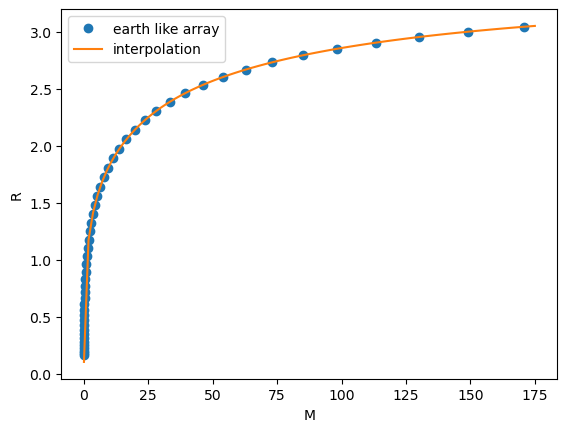

In [4]:
interpolation = interp1d(mass_earthlike, radius_earthlike, kind='quadratic', fill_value="extrapolate") #quadratic function that with extrapolate between values

mass_new = np.linspace(0, 175, 100)
radius_new = interpolation(mass_new)

plt.plot(mass_earthlike, radius_earthlike, 'o', label='earth like array')
plt.plot(mass_new, radius_new, linestyle='-', label='interpolation')
plt.xlabel("M")
plt.ylabel("R")
plt.legend()
plt.show()


In [5]:
path = '/home/hannakasperer/Dissertation-/Sample/main_sample_ab.csv'
sample = pd.read_csv(path,sep=',')

In [6]:
sample

,star,teff,erteff,logg,erlogg,vtur,ervtur,feh,erfeh,NaI,...,f_iron_exolens_S,f_iron_exolens_S_err,f_iron_exoplex_gaus,f_iron_exoplex_unif,f_iron_exoplex_gaus_err,f_iron_exoplex_unif_err,semi_major_axis,semi_major_axis_lower,semi_major_axis_upper,T_eq
0,55Cnc_SINGLEHR11_ESPRESSO_2022,5310,51,4.211,0.116,0.907,0.069,0.299,0.033,6.931,...,29.036816,3.022297,8.171521,5.373065,4.694734,0.000000,0.015440,0.00005,0.00005,1946.832878
1,CoRoT-07_ESPRESSO_2024,5269,31,4.381,0.070,0.694,0.061,0.044,0.020,6.456,...,32.345937,2.376082,36.328415,55.969306,7.909221,6.297244,0.017130,0.00012,0.00012,1752.336169
2,K2-106_ESPRESSO_2024,5505,24,4.338,0.040,0.738,0.037,0.080,0.017,6.498,...,33.135240,2.794964,35.799165,29.061990,5.500530,13.267039,0.013260,0.00023,0.00028,2305.992464
3,K2-314_ESPRESSO_2024,5555,21,4.023,0.039,1.008,0.026,0.163,0.017,6.556,...,28.765998,2.990467,17.070662,NaN,7.319743,NaN,0.047000,0.00700,0.00500,1580.079115
4,K2-229_ESPRESSO_2024,5126,34,4.336,0.079,0.809,0.066,-0.088,0.020,6.340,...,29.578864,3.006465,31.829867,71.452508,8.301016,11.685725,0.012888,0.00013,0.00013,1958.391068
5,HD136352_SINGLEHR11_ESPRESSO_2022,5652,16,4.371,0.030,0.880,0.028,-0.353,0.013,6.082,...,24.133177,2.746897,13.419642,NaN,6.060813,NaN,0.096400,0.00280,0.00280,906.082072
6,HD137496_ESPRESSO_2024,5797,18,4.093,0.025,1.129,0.022,-0.034,0.014,6.260,...,31.010453,1.243589,31.330112,67.906619,3.296939,6.327952,0.027320,0.00019,0.00019,2134.229902
7,TOI-402_ESPRESSO_2024,5067,47,4.201,0.119,0.568,0.098,0.054,0.027,6.582,...,29.498640,2.781164,29.670903,15.683370,6.368861,1.550063,0.052450,0.00072,0.00085,990.601060
8,HD20329_ESPRESSO_2024,5574,17,4.285,0.031,0.824,0.028,-0.106,0.014,6.325,...,23.823367,1.160150,22.272164,41.050002,2.904006,8.116552,0.018000,0.00030,0.00030,2138.998854
9,HD213885_ESPRESSO_2024,5906,17,4.427,0.025,1.043,0.025,-0.005,0.013,6.402,...,32.695349,1.037364,31.550260,38.059754,2.837946,16.772735,0.020120,0.00012,0.00015,2132.397389


In [7]:
#get the interpolation values for my masses
#their radius at earth like composition

interpolation(1)

jup_to_earth_r = 11.209
jup_to_earth_m = 317.83

#convert them to earth units
radius = sample["planet_radius"] * jup_to_earth_r
mass = sample["planet_mass"] * jup_to_earth_m

radius_sigma = sample['planet_radius_rel_err'] * radius
mass_sigma = sample["planet_mass_rel_err"] * mass


#interpolation of masses in earth units

radius_earthcomp = interpolation(mass)

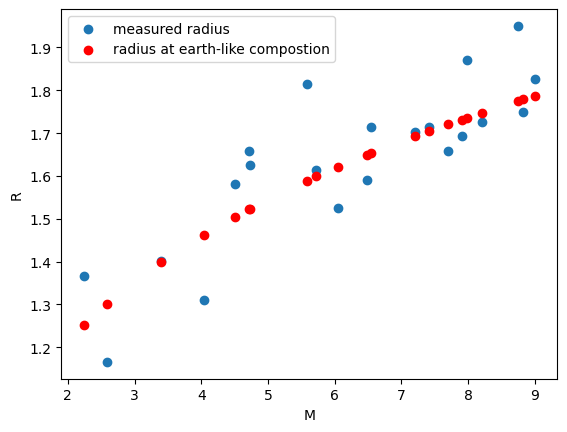

In [8]:
plt.scatter(mass,radius,label="measured radius")
plt.scatter(mass,radius_earthcomp,color="r",label="radius at earth-like compostion")
plt.xlabel("M")
plt.ylabel("R")
plt.legend()

In [9]:
density = (3*mass) / (4*np.pi*radius**3)
density_earthcomp = (3*mass) / (4*np.pi*radius_earthcomp**3)

scaled_density = density / density_earthcomp

### calculating errors for densities
##### 1. with error propagation formula
##### 2. with monte carlo (normal distribution of densities -> mu & sigma)
##### -> comparison between 1. and 2. to check if errors are computed right

In [10]:
#errors of radius

interpolation_der = derivative(interpolation, mass, dx=1e-6)
radius_earthcomp_err = interpolation_der * mass_sigma

#errors of density
density_err = np.sqrt(((3*mass_sigma)/(4*np.pi*radius**3))**2+((-9*mass*radius_sigma)/(4*np.pi*radius**4))**2)
density_earthcomp_err = np.sqrt(((3*mass_sigma)/(4*np.pi*radius_earthcomp**3))**2+((-9*mass*radius_earthcomp_err)/(4*np.pi*radius_earthcomp**4))**2)

scaled_density_err = (density / density_earthcomp) * np.sqrt((density_err/density)**2+(density_earthcomp_err/density_earthcomp)**2)

Text(0.5, 1.0, 'density comparison (earthlike - observed)')

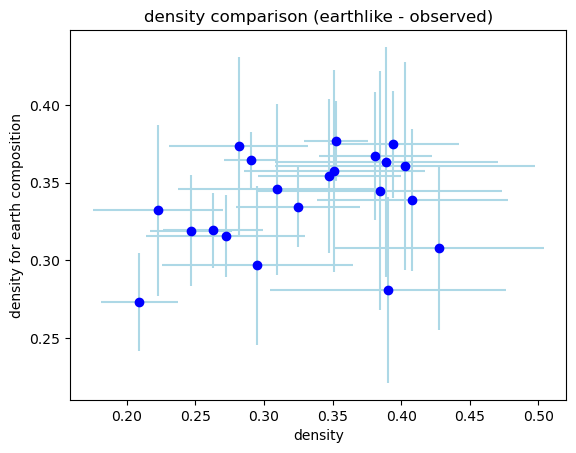

In [42]:
plt.errorbar(density,density_earthcomp,xerr=density_err,yerr=density_earthcomp_err,fmt="o",color="b",ecolor="lightblue")
plt.xlabel("density")
plt.ylabel("density for earth composition")
plt.title("density comparison (earthlike - observed)")

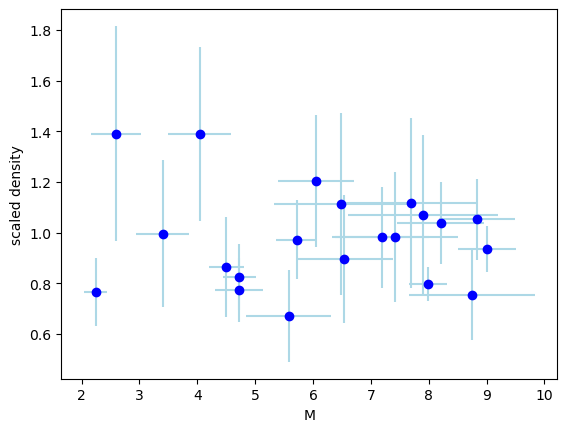

Text(0, 0.5, 'scaled density')

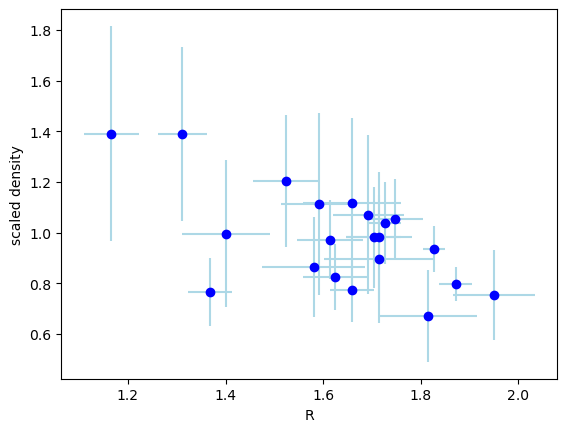

In [12]:
plt.errorbar(mass,scaled_density,xerr=mass_sigma, yerr=scaled_density_err,fmt="o",color="b",ecolor="lightblue")
plt.xlabel("M")
plt.ylabel("scaled density")
plt.show()

plt.errorbar(radius,scaled_density,xerr=radius_sigma, yerr=scaled_density_err,fmt="o",color="b",ecolor="lightblue")
plt.xlabel("R")
plt.ylabel("scaled density")

density mu list: [0.2912622576581106, 0.4124385633148524, 0.38209426907041205, 0.2866810518153684, 0.39633714142333376, 0.24748308468179658, 0.4310187277309593, 0.3492364450809308, 0.35452940251319986, 0.3962063803453474, 0.26558565823778246, 0.32773534593475506, 0.2801332832337326, 0.22642199744000463, 0.3937933351964279, 0.31704689401765757, 0.3911887462235967, 0.4113250600358802, 0.3035218941701521, 0.21047585501980903, 0.3526219901293599]
density std list: [0.019822647356669394, 0.07078866399893526, 0.041706019700078305, 0.052188490549794776, 0.08780054483719384, 0.0301280738947235, 0.07809053282432707, 0.052291654032274044, 0.06686448340119862, 0.048655022124832664, 0.037012690287581175, 0.04626885540533409, 0.061685959726643584, 0.04903748191085219, 0.08296684674849196, 0.07686055625931523, 0.0909715463792823, 0.10036193912043662, 0.073938083671191, 0.028134503822726368, 0.023439967609934494]


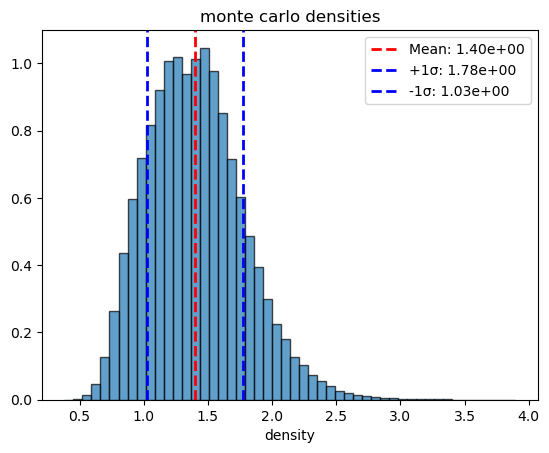

In [38]:
num_samples = 10000

def compute_density(M, r):
    return (3 * M) / (4 * np.pi * r**3)

density_mu_list = []
density_std_list = []

density_mu_earth = []
density_std_earth = []

for j in range(len(mass)):
    density_samples = np.zeros(num_samples)
    density_samples_earth = np.zeros(num_samples)

    
    for i in range(num_samples):
        
        #density (normal radius)

        M_sample = np.random.normal(mass[j], mass_sigma[j])
        r_sample = np.random.normal(radius[j], radius_sigma[j])
        density_samples[i] = compute_density(M_sample, r_sample)
        
        #density at earth composition
        #M_sample_earth = np.random.normal(mass[j], mass_sigma[j])
        #r_sample_earth = np.random.normal(radius_earthcomp[j], radius_earthcomp_err[j])
        #density_samples_earth[i] = compute_density(M_sample_earth, r_sample_earth)
    
    #density (normal radius)
    density_mu = np.mean(density_samples)
    density_std = np.std(density_samples)

    density_mu_list.append(density_mu)
    density_std_list.append(density_std)

    #density (at earth composition radius)
    #density_mu_e = np.mean(density_samples_earth)
    #density_std_e = np.std(density_samples_earth)

    #density_mu_earth.append(density_mu_e)
    #density_std_earth.append(density_std_e)


print("density mu list:",density_mu_list)
print("density std list:", density_std_list)

all_density_samples = np.concatenate([
    np.random.normal(mass[j], mass_sigma[j], num_samples) / 
    (np.random.normal(radius[j], radius_sigma[j], num_samples) ** 3)
    for j in range(len(mass))
])

plt.hist(all_density_samples, bins=50, edgecolor='black', alpha=0.7, density=True)

mu = np.mean(all_density_samples)
sigma = np.std(all_density_samples)

plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mu:.2e}")
plt.axvline(mu + sigma, color='blue', linestyle='dashed', linewidth=2, label=f"+1σ: {(mu + sigma):.2e}")
plt.axvline(mu - sigma, color='blue', linestyle='dashed', linewidth=2, label=f"-1σ: {(mu - sigma):.2e}")

plt.xlabel('density')
plt.title('monte carlo densities')
plt.legend()
plt.show()



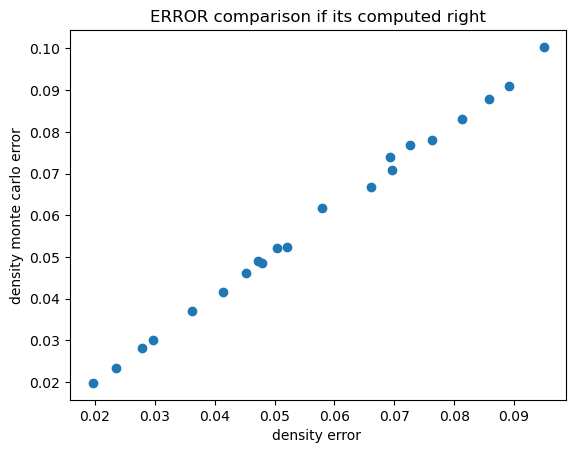

In [40]:
plt.scatter(density_err,density_std_list)
plt.xlabel("density error ")
plt.ylabel("density monte carlo error")
plt.title("ERROR comparison if its computed right")
plt.show()

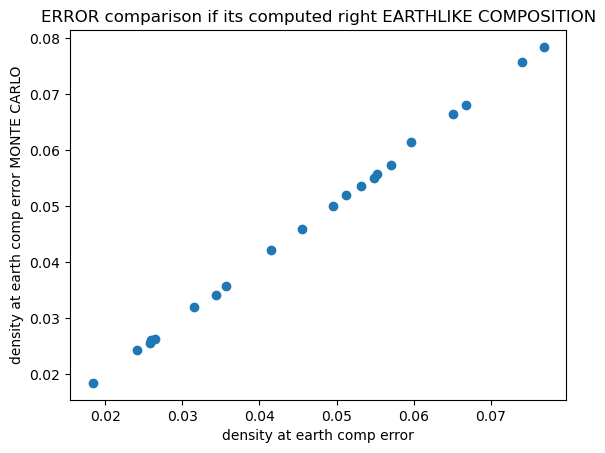

In [37]:
plt.scatter(density_earthcomp_err,density_std_earth)
plt.xlabel("density at earth comp error")
plt.ylabel("density at earth comp error MONTE CARLO")
plt.title("ERROR comparison if its computed right EARTHLIKE COMPOSITION")
plt.show()

#### scaled density vs compositions from abund

linear fit: y =  0.017360212494523918  x + 0.5310762154722695


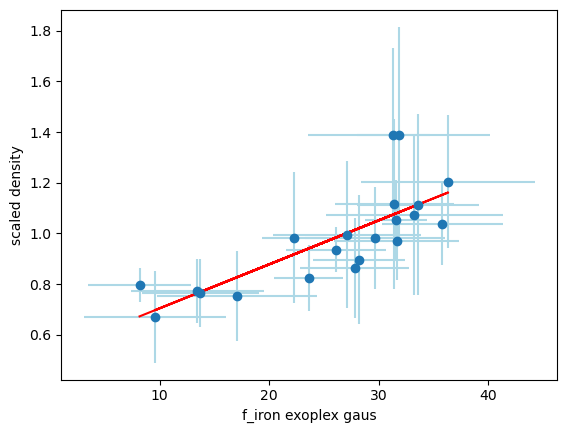

In [16]:
plt.errorbar(sample["f_iron_exoplex_gaus"],scaled_density,xerr=sample["f_iron_exoplex_gaus_err"],yerr=scaled_density_err,fmt="o",ecolor="lightblue")
plt.xlabel("f_iron exoplex gaus")
plt.ylabel("scaled density")

k ,d = np.polyfit(sample["f_iron_exoplex_gaus"],scaled_density, 1)
yfit = k * np.array(sample["f_iron_exoplex_gaus"]) + d

plt.plot(sample["f_iron_exoplex_gaus"], yfit, color='r')

print("linear fit: y = ",k," x +",d)

linear fit: y =  0.007993661922840203  x + 0.7280414578232287


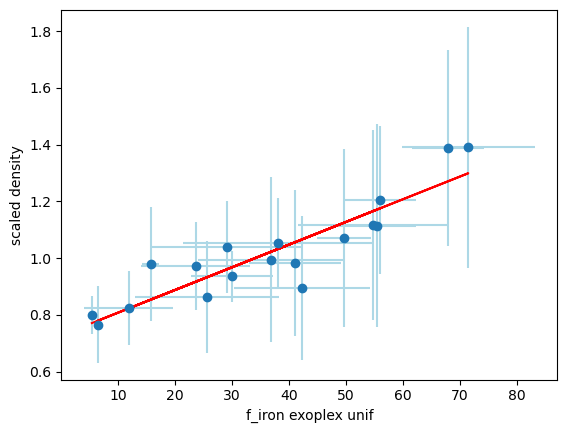

In [20]:
plt.errorbar(sample["f_iron_exoplex_unif"],scaled_density,xerr=sample["f_iron_exoplex_unif_err"],yerr=scaled_density_err,fmt="o",ecolor="lightblue")
plt.xlabel("f_iron exoplex unif")
plt.ylabel("scaled density")

clean_sample = sample.dropna(subset=["f_iron_exoplex_unif"])
x = clean_sample["f_iron_exoplex_unif"]
y = scaled_density[clean_sample.index] 

k,d = np.polyfit(x,y, 1)
yfit = k * np.array(x) + d

plt.plot(x, yfit, color='r')

print("linear fit: y = ",k," x +",d)

linear fit: y =  0.02998816922174486  x + 0.09450940994290431


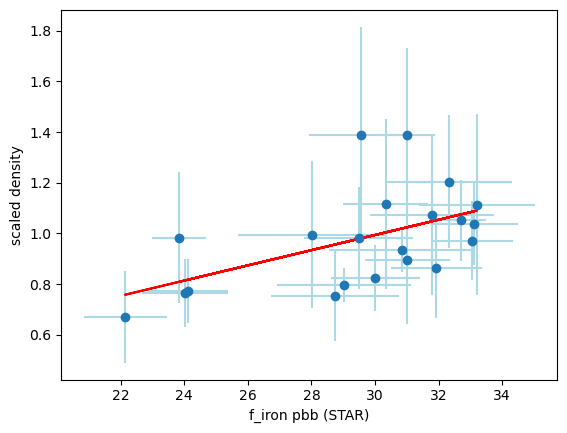

In [21]:
plt.errorbar(sample["f_iron_pbb"],scaled_density,xerr=sample["f_iron_pbb_err"],yerr=scaled_density_err,fmt="o",ecolor="lightblue")
plt.xlabel("f_iron pbb (STAR)")
plt.ylabel("scaled density")

clean_sample = sample.dropna(subset=["f_iron_pbb"])
x = clean_sample["f_iron_pbb"]
y = scaled_density[clean_sample.index] 

k,d = np.polyfit(x,y, 1)
yfit = k * np.array(x) + d

plt.plot(x, yfit, color='r')

print("linear fit: y = ",k," x +",d)

linear fit: y = (-3.29 ± 1.95)x + (1.08 ± 0.07)


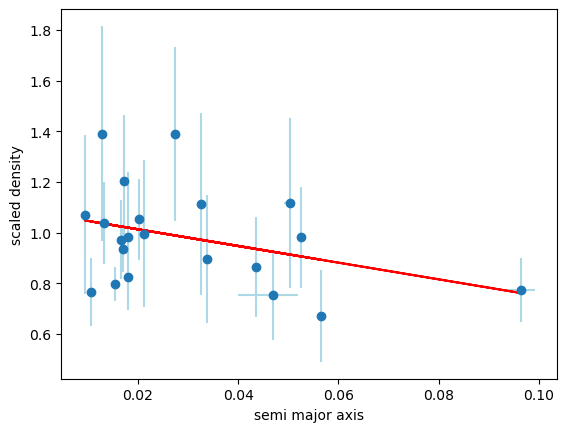

In [30]:
xerr= [sample["semi_major_axis_lower"],sample["semi_major_axis_upper"]]
plt.xlabel("semi major axis")
plt.ylabel("scaled density")

coeffs,cov = np.polyfit(sample["semi_major_axis"],scaled_density, 1, cov=True)

k, d = coeffs
k_err = np.sqrt(cov[0, 0])
d_err = np.sqrt(cov[1, 1])

yfit = k * np.array(sample["semi_major_axis"]) + d

#mask = sample["semi_major_axis"] < 0.06
#filtered_x = sample["semi_major_axis"][mask]
#filtered_y = scaled_density[mask]

#k, d = np.polyfit(filtered_x, filtered_y, 1)
#yfit = k * np.array(filtered_x) + d
#plt.plot(filtered_x, yfit, color='r')

plt.errorbar(sample["semi_major_axis"], scaled_density, xerr=xerr, yerr=scaled_density_err, fmt="o", ecolor="lightblue")
plt.plot(sample["semi_major_axis"], yfit, color="r")
plt.xlabel("semi major axis")
plt.ylabel("scaled density")

print(f"linear fit: y = ({k:.2f} ± {k_err:.2f})x + ({d:.2f} ± {d_err:.2f})")

linear fit: y =  0.00011333770832008045  x + 0.7812281673816079


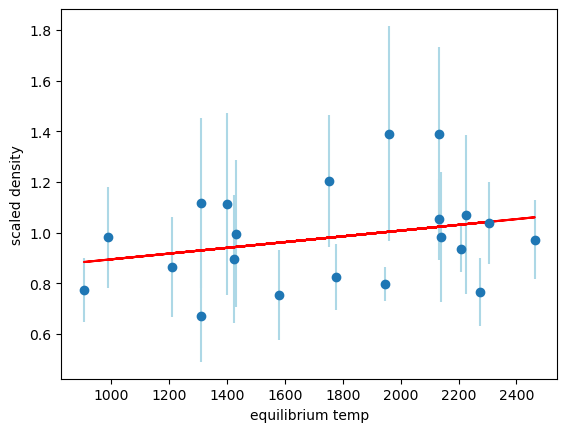

In [ ]:
plt.errorbar(sample["T_eq"],scaled_density,yerr=scaled_density_err,fmt="o",ecolor="lightblue")
plt.ylabel("scaled density")
plt.xlabel("equilibrium temp")

k ,d = np.polyfit(sample["T_eq"],scaled_density, 1)
yfit = k * np.array(sample["T_eq"]) + d
plt.plot(sample["T_eq"],yfit,color="r")

print("linear fit: y = ",k," x +",d)